In [1]:
# Import Dependencies and API keys:


# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import gmaps
from random import random
from citipy import citipy
import openweathermapy as ow

#import openweathermapy as ow

import time



# API keys
from config import api_key




In [5]:
#Generate a random list of cities

#List for holding lat_lngs and cities

LatLon = []
cities = []



# Create a set of random lat and log combinations
Lat = np.random.uniform(low=-50, high=50, size=3000)
Lon = np.random.uniform(low=-150, high=150, size=3000)
LatLon = zip(Lat, Lon)


# Identify nearest city for each lat, log combination
for LatLon in LatLon:
    city = citipy.nearest_city(LatLon[0], LatLon[1]).city_name
    
    # Replace spaces with %50 to create url correctly 
    city = city.replace(" ", "%50")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

1259

In [6]:
#Perform API Calls

api_key = "4b48348348dc03d3850ee7ec67294c1f"


url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key




In [7]:
#Perform API Calls

#api_key = "6c2968f4c18e094e35f636aa96c3d922"

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Then create empty lists to append API data into lists 

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
counter = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


#Looping through the cities in the city list 

for city in cities:  
    
    # Try statement to append calls where value is found 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        counter= counter + 1
        
        # Wait a second in loop to not exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Ski

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [8]:
# Create a dictonary with the lists generated and then create a dataframe from this dictionary
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lon":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


weather_data = pd.DataFrame(weatherpy_dict)

# Displaying count of weather data values 
weather_data.count()

City          965
Cloudiness    965
Country       965
Date          965
Humidity      965
Lat           965
Lon           965
Max Temp      965
Wind Speed    965
dtype: int64

In [9]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Bismarck,1,US,1585387328,86,46.81,-100.78,39.00,5.82
1,Jamestown,90,US,1585387328,65,42.10,-79.24,48.00,5.82
2,Padang,99,ID,1585387328,73,-0.95,100.35,83.91,3.94
3,Pecos,1,US,1585387329,22,31.42,-103.49,57.20,18.34
4,Rikitea,89,PF,1585387329,79,-23.12,-134.97,78.21,8.19


In [11]:
# Save data frame to CSV
weather_data.to_csv("weather_data.csv")

## Scatter Plot for Latitude vs. Temperature

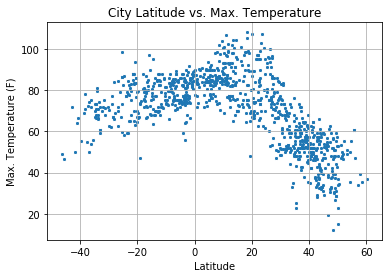

In [19]:
# Creating a scatter plot to show a Latitude vs. Temperature relationship

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="x", s=5)

# Defining labels

plt.title("City Latitude vs. Max. Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_v_Max_Temp.png")
#plt.savefig("output_plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()
